<h3><center> DIMENSIONALITY REDUCTION </h3></center>



We worked with two **independent** variables for two reasons:
- Because we needed two dimensions to visualize better how Machine Learning models worked (by plotting the prediction regions and the prediction boundary for each model).
- Because whatever is the original number of our independent variables, we can often end up with two independent variables by applying an appropriate Dimensionality Reduction technique.

There are two types of Dimensionality Reduction techniques:
- **_Feature Selection_** which select some features from the dataset, such as Backward Elimination, Forward Selection, Bidirectional Elimination, Score Comparison and more (Regression section). It increase the _accuracy_, reduce the _training time_ and prevent _overfitting_.
- **_Feature Extraction_** which create a new set of variables.
   - **_Principal Component Analysis (PCA)_** is considered one of the most used unsupervised technique. **From $m$ independent variables of your dataset, PCA extracts $p \leq m$ new independent variable that explain most of the varianca of the dataset, regardless of the dependent variable_** Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set. The ability to generalize correctly becomes exponentially harder as the dimensionality of the training dataset grows. On the other hand, it is used to overcome feature redundancy in the dataset. It uses the eigenvector and eigenvalues in order to determine the new variables as a linear combination of them. PCA is based on the Pearson correlation coefficient framework and inherits similar assumptions: _sample size_, minimum of 150 observations and ideally a 5:1 ratio of observation to features, _correlations_,  the feature set is correlated, so the reduced feature set effectively represents the original data space, _linearity_, all variables exhibit a constant multivariate normal relationship, and principal components are a linear combination of the original features, _outliers_, sensitive to them, _Large variance implies more structure_, high variance axes are treated as principal components, while low variance axes are treated as noise and discarded. Source: https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db PCA make the standardization of data. 
   - **_Linear Discriminant Analysis (LDA)_** aims to maximise the component axes for class-separation.
   - **_Kernel PCA_**: non-linear dimensionality reduction through the use of kernels
   - **_Quadratic Discriminant Analysis (QDA)_**
   
Correlation between attributes can be dangerous for _some_ algorithms (https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features), especially the linear ones. So, making a feature selection or extraction help us to take the most importnant information avoiding to work with that garbage.

In [70]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [58]:
def plot_classification(classifier, X,Y):
    # definisco i set che mi servono.
    X_set, y_set = X, Y
    
    # creo una griglia di punti per creare la linea di confine.
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    
    # partiziono lo spazio sulla base della griglie e delle predizioni fatte su di essa. 
    plt.contourf(X1, 
                 X2, 
                 classifier.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, 
                 cmap = ListedColormap(('red', 'green', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    # inserisco i punti del dataset scelto e li coloro in base alla classe.
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], # seleziono i punti della var. dipendente associati ad una certa categoria,
                    X_set[y_set == j, 1], # ne prendo i due valori che mi servono e li plotto.
                    c = ListedColormap(('red', 'green', 'blue'))(i), 
                    label = j # legenda.
                   )
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

In [73]:
# Each row corresponds to a wine and tehe columns
# describes its characteristics. From UCI.
# The goal is to cluster wines.
dataset = pd.read_csv('Dataset/Wine.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables.
                                                    y, # dependent variables.
                                                    test_size = 0.2, # size of test set.
                                                    random_state = 0) # fix the seed for both of data set.

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Make the PCA after applying the training phase.
# pca = PCA(n_components = 2) # number of final components: the correct number derives from the analysis of variance.
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# Make the LDA.
# lda = LDA(n_components = 2)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

# Make Kernel PCA.
kpca = KernelPCA(n_components = 2, # number of final components
                kernel = 'rbf' # radial basis function
                ) 
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# Train the logistic regression. 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Confusion matrix.
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred) 

# PCA can improve the results because turn out some redundant information.

1.0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


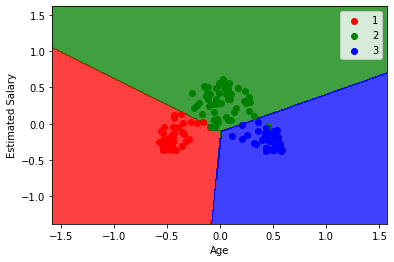

In [74]:
plot_classification(classifier, X_train, y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


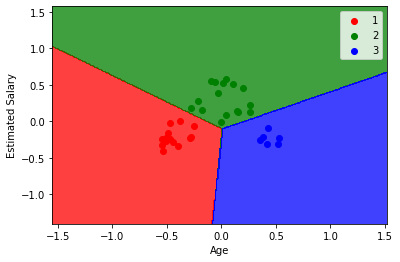

In [75]:
plot_classification(classifier, X_test, y_test)